## Efficient Market Hyphotesis ---- Apple INC

In [ ]:
#! pip install yahoo_fin
#! pip install arch

In [ ]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import scipy.stats as stat
import scipy
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from arch.unitroot import VarianceRatio
from yahoo_fin.stock_info import *

In [ ]:
# We will look at stock prices 
start = datetime.datetime(2011,8,1)
end = datetime.datetime(2011,10,31)

### 1. Get DATA

In [ ]:
stock_AAPL = get_data('AAPL' , start_date = start, end_date = end)
stock_AAPL=stock_AAPL.dropna()
close_AAPL = pd.DataFrame(stock_AAPL["close"]).dropna()
simple_return_AAPL = close_AAPL.pct_change().dropna()
log_return_AAPL = np.log(1+simple_return_AAPL)

### 2. Exploratory Data Analysis

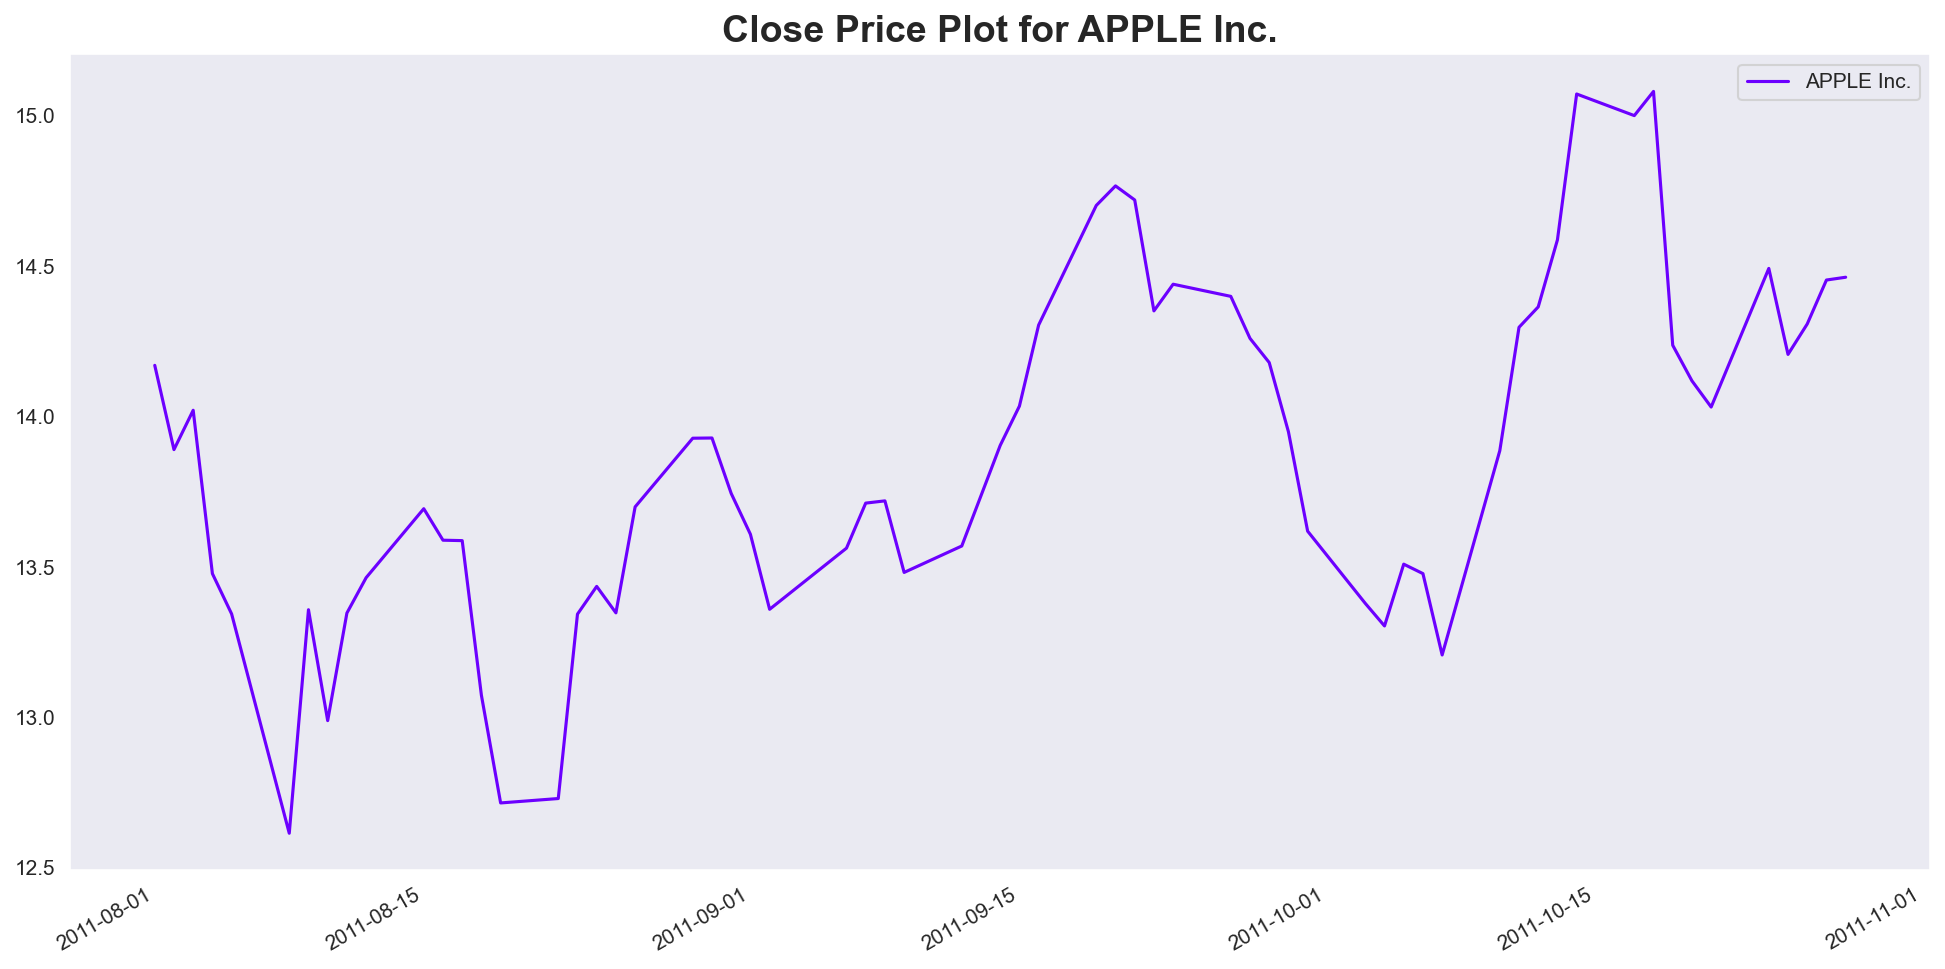

In [ ]:
plt.figure(figsize=(16, 8), dpi=150)
stock_AAPL["close"].plot(label = 'APPLE Inc.', color = '#6C00FF', grid = False) # Plot the closing price 
# adding title to the plot
plt.title('Close Price Plot for APPLE Inc.', fontweight = 'bold', fontsize=18)
# adding legend to the curve
plt.legend()

### 3. Efficient Markey Hyphotesis


Efficient market classification: 
1. Efficiency in a **weak** form - the amount of information includes only the transaction history;
2. Efficiency in a **semi-strong** form - the amount of information includes: the transaction history + all public information, known by all participants in the transactions;
3. Efficiency in a **strong** form - the amount of information includes all the information known to any of the actors of the capital market (including private information).

The weak form efficiency of a market depends on testing the hypothesis that the trading price is a random walk; thus, if the logarithmic transaction price is RW, then the series of returns is stationary, and, moreover, it is a WN-type process.


### 3.1. Stationarity testing

In [ ]:
from arch.unitroot import ADF
adf = ADF(np.log(close_AAPL))
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.074
P-value                         0.255
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.54 (1%), -2.91 (5%), -2.59 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


According to ADF Test, applied on the logarithmic series of the close price for APPLE, we can conclude that the series is **non-stationary**. That being said, we can add that the APPLE Price, in August 2011 - October 2011, follows a *RW* model, which implies that the return series is *WN*. But more tests should be implemented in order to be sure of these conclusions, such as KPSS, Variance Ratio, and Ljung-Box tests. 

In [ ]:
from arch.unitroot import KPSS
series = np.log(close_AAPL)

kpss = KPSS(series)
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.690
P-value                         0.014
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


Because the p-value is below 5% baseline, and the critical values are lower than LM statistics, we will reject the null hypothesis of the test (that implies also a stationary process). So, the logarithmic series of the APPLE price is **non-stationary**. 

### 3.2. Individual Variance Ratio Tests

In [ ]:
from arch.unitroot import VarianceRatio

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


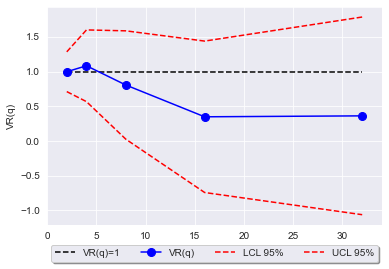

In [ ]:
x = np.asarray(close_AAPL)
x = np.log(x)
N=len(x)
vr_1=[]
vrt = []
w=[]
varvrt = []
zvrt = []
q = []
lcl=[]
ucl=[]
vr_1=[]
p_value=[]
stderr=[]
alpha=0.05
k=5

def VRTest():
    for ii in range (1, k+1):
        a=2**ii
        q.append(a)
        vr = VarianceRatio(x, a)
        vrt.append(vr.vr)
        se=np.sqrt(vr._stat_variance)/np.sqrt(vr._nobs-1)
        stderr.append(se)
        lower=vr.vr-stat.norm.ppf(1-alpha/2)*se
        upper=vr.vr+stat.norm.ppf(1-alpha/2)*se
        one=1
        zvrt.append(vr.stat)
        lcl.append(lower)
        ucl.append(upper)
        vr_1.append(one)
        p_value.append(vr.pvalue)

    return vrt,p_value,zvrt,q,stderr 
VRTest()

confidence=1-alpha
%pylab inline
#pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
#plt.ylim(min(lcl), max(ucl))
plt.xlim(0, 2**k+2)
plt.xlabel( 'q' )
plt.ylabel( 'VR(q)' )
plt.plot(q, vr_1,color='black', linestyle='dashed', label='VR(q)=1')
plt.plot(q, vrt, color='blue', marker='o',markerfacecolor='blue', markersize=8,label='VR(q)')
plt.plot(q, lcl,color='red', linestyle='dashed', label='LCL ' +str('{:.0%}'.format(confidence)))
plt.plot(q, ucl,color='red', linestyle='dashed', label='UCL ' +str('{:.0%}'.format(confidence)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07),fancybox=True, shadow=True, ncol=5)

plt.show()

In [ ]:
results_AAPL = pd.DataFrame(columns=['q','VR test', 'Std. Error','z statistic', 'P-value'])
results_AAPL['q']=q
results_AAPL['VR test']=vrt
results_AAPL['Std. Error']=stderr
results_AAPL['z statistic']=zvrt
results_AAPL['P-value']=p_value

In [ ]:
%%latex
\[\left\{ \begin{align}
  & {{H}_{0i}}:VR({{q}_{i}})=1 \\ 
 & {{H}_{Ai}}:VR({{q}_{i}})\ne 1 \\ 
\end{align} \right.\]

<IPython.core.display.Latex object>

In [ ]:
results_AAPL

,q,VR test,Std. Error,z statistic,P-value
0,2,0.997997,0.146215,-0.013698,0.989071
1,4,1.083883,0.263720,0.318077,0.750427
2,8,0.806356,0.398493,-0.485939,0.627010
3,16,0.348420,0.556765,-1.170296,0.241882
4,32,0.361903,0.726857,-0.877885,0.380006


Variance Ratio Test is showing a RW process with homoskedasticity (aspect tested by the null hypothesis). Because all values of p-value are greater than 5%, the null hypothesis cannot be reject, so we can talk about a financial market with weak efficiency, but more tests should be conducted, such as *SMM Test* and *Multiple Variance Ratio Test - Wald Test*


### 3.3.1 Multiple Variance Ratio Test - Studentized Maximum Modulus

In [ ]:
z = abs(results_AAPL["z statistic"]).max()
alpha_star = 1-(1-alpha)**(1/k)
alpha_star
z_star = stat.norm.ppf(1-alpha_star/2)
z_star

mvr = pd.DataFrame(columns = ['z Statistic','Critical z','Decision'])
mvr.at[0,'z Statistic'] = z
mvr['Critical z'] = z_star
if z < z_star:
    mvr['Decision'] = "Cannot reject the null hypothesis of random walk"
else:
    mvr['Decision'] = "Reject the null hypothesis of random walk"
mvr

,z Statistic,Critical z,Decision
0,1.170296,2.568763,Cannot reject the null hypothesis of random walk


Studentized Maximum Modulus Test confirms the existence of a **random walk** model for the close price of APPLE; that's the reason we cannot reject the hull hyphotesis, so we have a **market with weak efficiency**.

### 3.3.2 Multiple Variance Ratio Test - Wald Test

In [ ]:
#Compute the covariance matrix
cov1 = np.zeros((k,k))

q = np.asarray(q)

for i in range (0,k-1):
    for j in range (i+1,k):
        cov1[i][j] = 2*(3*q[j]-q[i]-1)*(q[i]-1)/(3*q[j])
cov2 = np.transpose(cov1)
cov = cov1+cov2

for i in range (0,k):
    #for j in range (i+1,k):
  
    cov[i][i] = 2*(2*q[i]-1)*(q[i]-1)/(3*q[i])
    
Wald_Test = np.matmul(np.asarray(vrt)-1,np.linalg.inv(cov))
                    
Wald_Test = N*np.matmul(Wald_Test,np.transpose(np.asarray(vrt)-1))

p_val = 1-stat.chi2.cdf(Wald_Test,k)

mvrw = pd.DataFrame(columns = ['Wald Test','Critical Chi2','P-value','Decision'])
mvrw.at[0,'Wald Test'] = Wald_Test
mvrw['Critical Chi2'] = stat.chi2.ppf(alpha/2,k)
mvrw['P-value'] = p_val
if p_val > 0.05:
    mvrw['Decision'] = "Cannot reject the null hypothesis of random walk"
else:
    mvrw['Decision'] = "Reject the null hypothesis of random walk"
mvrw

,Wald Test,Critical Chi2,P-value,Decision
0,5.531041,0.831212,0.354554,Cannot reject the null hypothesis of random walk


So, for 3 months, starting from August 2011, till the last days of October 2011, the close price series for APPLE follows the efficient market hypothesis in a **weak form**. 

# CONCLUSIONS 

|  | APPLE Inc. |  |
| --- | --- | --- |
| *Stationarity testing* | 
| -> ADF | the logarithmic series of the price is non-stationary, RW => the series of returns is WN | 
| -> KPSS | the logarithmic series of the price is non-stationary| 
| *Individual Variance Ratio Tests* | does not reject H0, weak market efficiency| 
| *Multiple Variance Ratio Tests* |  
| -> Studentized Maximum Modulus | does not reject H0, RW model for price| 
| -> Wald Test | does not reject H0, RW model for price| 
| Efficiency of the market| **weak**| 